In [437]:
from pandas import read_csv 
from tensorflow.keras import layers , models
from matplotlib.pyplot import plot , xlabel , ylabel , show , title , legend , pie
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
tokenizer = Tokenizer(oov_token='<00U00>')

In [438]:
train_path = "D:\\datasets\\News_Topic\\training_data.csv"
test_path = "D:\\datasets\\News_Topic\\test_data.csv"
file_tr = read_csv(train_path)
file_tst = read_csv(test_path)
df = file_tr.copy()
df_tst = file_tst.copy()

In [439]:
df.sample(10)

,text,label
73711,Smith proves he has class to fulfil all United...,1
78414,Japan vows to stay in Iraq despite killing BAG...,0
36042,"African Leaders Seek More Cell Phones, Compute...",3
75384,"Opec begs US help to calm oil market Opec, the...",2
40331,Hamm #39;s case to keep gold goes to arbitrato...,1
117881,Eli should envy friends of Ben #39;s Ben Roeth...,1
29926,Intel discloses WiMAX silicon plans SAN FRANCI...,3
15959,Corporate kleptocracy that mirrors Maxwell #39...,2
91053,Meta Arafat! Palestinians deserve his dream Th...,0
34767,Israeli Missile Strike Kills Two Gaza Militant...,0


In [440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    120000 non-null  object
 1   label   120000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ MB


In [441]:
df_tst.columns = df.columns
df_tst

,text,label
0,European stocks rally on hope ECB may be done ...,2
1,"Gold prices have hit a new high, while the val...",2
2,Why food discount stickers may be a thing of t...,2
3,German cabinet tries to solve ‘no-debt’ crisis...,2
4,Indonesia's volcano eruption leaves 22 dead,0
5,"Adverts for Air France, Lufthansa and Etihad h...",0
6,Maori MP performs haka before swearing oath to...,0
7,Philippines earthquake: Video shows chaos in s...,0
8,Wakeskater plunges off Dubai skyscraper pool i...,0
9,Daniel Wiffen secures European Aquatic Champio...,1


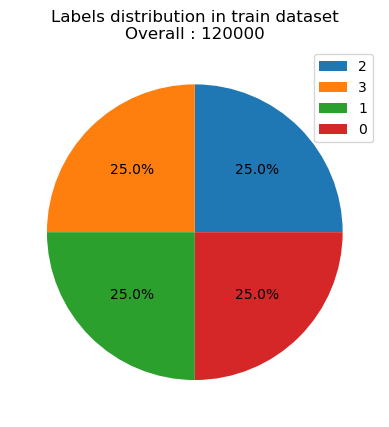

In [442]:
lbl = df.label.unique()
pie([df.label.to_list().count(l) for l in lbl],autopct='%1.1f%%')
title(f'Labels distribution in train dataset\nOverall : {len(df.label)}')
legend(lbl)
show()

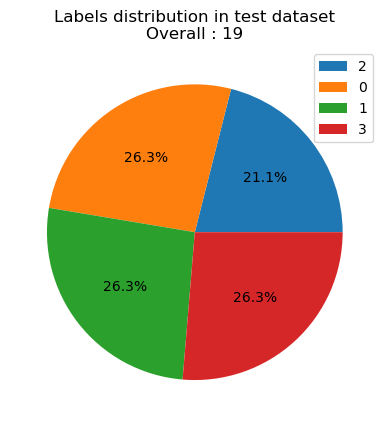

In [443]:
lbl = df_tst.label.unique()
pie([df_tst.label.to_list().count(l) for l in lbl],autopct='%1.1f%%')
title(f'Labels distribution in test dataset\nOverall : {len(df_tst.label)}')
legend(lbl)
show()

In [444]:
#Creating a function to remove stop words from each text .
def Filter(text)->str:
    '''function docstring'''
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
    result = [word for word in text.lower().split() if word not in stopwords]
    return ' '.join(result)

In [562]:
features = [Filter(text) for text in df['text']]
labels = df.label.to_numpy().reshape(-1,1)
labels = to_categorical(labels)
tokenizer.fit_on_texts(features)
seqs = tokenizer.texts_to_sequences(features)
mxlen = 100
matrix = pad_sequences(seqs,padding='post',truncating='post',maxlen=mxlen)

In [563]:
matrix.shape

(120000, 100)

In [564]:
labels.shape

(120000, 4)

In [565]:
labels[-10:]

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [566]:
model = models.Sequential([layers.Embedding(len(tokenizer.index_word)+1,4,input_length=mxlen),
                          layers.GlobalAveragePooling1D(),
                          layers.Dense(4,activation='softmax')])
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [567]:
xtr , ytr = matrix[:100000] , labels[:100000]
xts , yts = matrix[100000:] , labels[100000:]

In [568]:
if len(xtr)==len(ytr) and len(xts)==len(yts):
    print(f'Train size : {len(xtr)}\nValid size : {len(xts)}')

Train size : 100000
Valid size : 20000


In [569]:
history = model.fit(xtr , ytr,epochs=10,validation_data=(xts , yts))

Epoch 1/10
3125/3125 [==============================] - 14s 4ms/step - loss: 0.9981 - accuracy: 0.7956 - val_loss: 0.6249 - val_accuracy: 0.8692
Epoch 2/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.4448 - accuracy: 0.8962 - val_loss: 0.3830 - val_accuracy: 0.8934
Epoch 3/10
3125/3125 [==============================] - 7s 2ms/step - loss: 0.3228 - accuracy: 0.9107 - val_loss: 0.3129 - val_accuracy: 0.9068
Epoch 4/10
3125/3125 [==============================] - 8s 2ms/step - loss: 0.2760 - accuracy: 0.9188 - val_loss: 0.2834 - val_accuracy: 0.9128
Epoch 5/10
3125/3125 [==============================] - 7s 2ms/step - loss: 0.2473 - accuracy: 0.9248 - val_loss: 0.2685 - val_accuracy: 0.9145
Epoch 6/10
3125/3125 [==============================] - 8s 2ms/step - loss: 0.2259 - accuracy: 0.9299 - val_loss: 0.2601 - val_accuracy: 0.9151
Epoch 7/10
3125/3125 [==============================] - 7s 2ms/step - loss: 0.2089 - accuracy: 0.9344 - val_loss: 0.2532 - val_accuracy

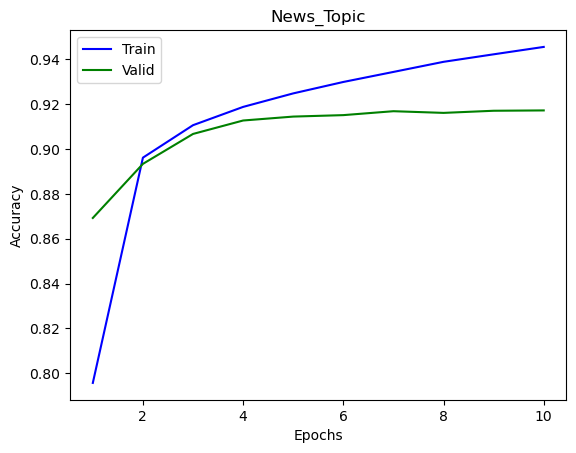

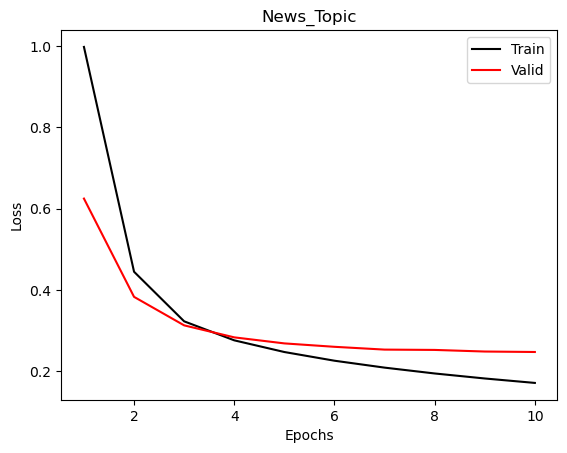

In [575]:
#Visualize models performance
epoch = range(1,len(history.epoch)+1)
results = history.history
plot(epoch,results['accuracy'],'blue')
plot(epoch,results['val_accuracy'],'green')
xlabel('Epochs')
ylabel('Accuracy')
title('News_Topic')
legend(['Train','Valid'])
show()
plot(epoch,results['loss'],'black')
plot(epoch,results['val_loss'],'red')
xlabel('Epochs')
ylabel('Loss')
title('News_Topic')
legend(['Train','Valid'])
show()

In [571]:
features_tst = [Filter(text) for text in df_tst['text']]
labels_tst = df_tst.label.to_numpy().reshape(-1,1)
labels_tst = to_categorical(labels_tst)
seqs_tst = tokenizer.texts_to_sequences(features_tst)
matrix_tst = pad_sequences(seqs_tst,padding='post',truncating='post',maxlen=mxlen)

In [572]:
matrix_tst.shape

(19, 100)

In [573]:
labels_tst.shape

(19, 4)

In [574]:
model.evaluate(matrix_tst,labels_tst)

1/1 [==============================] - 0s 183ms/step - loss: 0.7435 - accuracy: 0.8947


[0.7435358166694641, 0.8947368264198303]